In [43]:
%pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Read the dataset
pd.set_option('display.precision', 2)
df = pd.read_csv('Housing.csv')  # Update the path if your file is elsewhere

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Preprocessing: ensure all feature columns are numeric and no missing values
import numpy as np
import pandas as pd

print("Before preprocessing:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())

# 1) Convert common yes/no text columns to 0/1 (case-insensitive)
for col in ['basement', 'guestroom']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0, 'y': 1, 'n': 0})
        # if mapping produced NaN for unexpected strings, try coercion to numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 2) Convert any remaining object columns:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
obj_cols = [c for c in obj_cols if c != 'price']  # don't touch target here
if obj_cols:
    print("Object columns detected:", obj_cols)
    # Try to coerce to numeric where possible (numbers stored as strings)
    for c in obj_cols:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 3) Now fill missing numeric values (median is robust) or drop rows if you prefer
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 4) Final sanity checks
print("\nAfter preprocessing:\n", df.dtypes)
print("Missing values after fill:\n", df.isnull().sum())

# Recreate X and y (safe to run even if earlier cells created them)
X = df.drop('price', axis=1)
y = df['price']
print("\nFinal shapes -> X:", X.shape, "y:", y.shape)
print("Sample X dtypes:\n", X.dtypes.head(10))

Before preprocessing:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Object columns detected: ['mainroad', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

After preprocessing:
 price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad            float

In [45]:
# Select relevant features and target variable
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'guestroom']
df = df[columns]

In [46]:
# Inspect data rows
df.head()

,price,area,bedrooms,bathrooms,stories,basement,guestroom
0,13300000,7420,4,2,3,0,0
1,12250000,8960,4,4,4,0,0
2,12250000,9960,3,2,2,1,0
3,12215000,7500,4,2,2,1,0
4,11410000,7420,4,1,2,1,1


In [47]:
# Check for missing values
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
basement     0
guestroom    0
dtype: int64

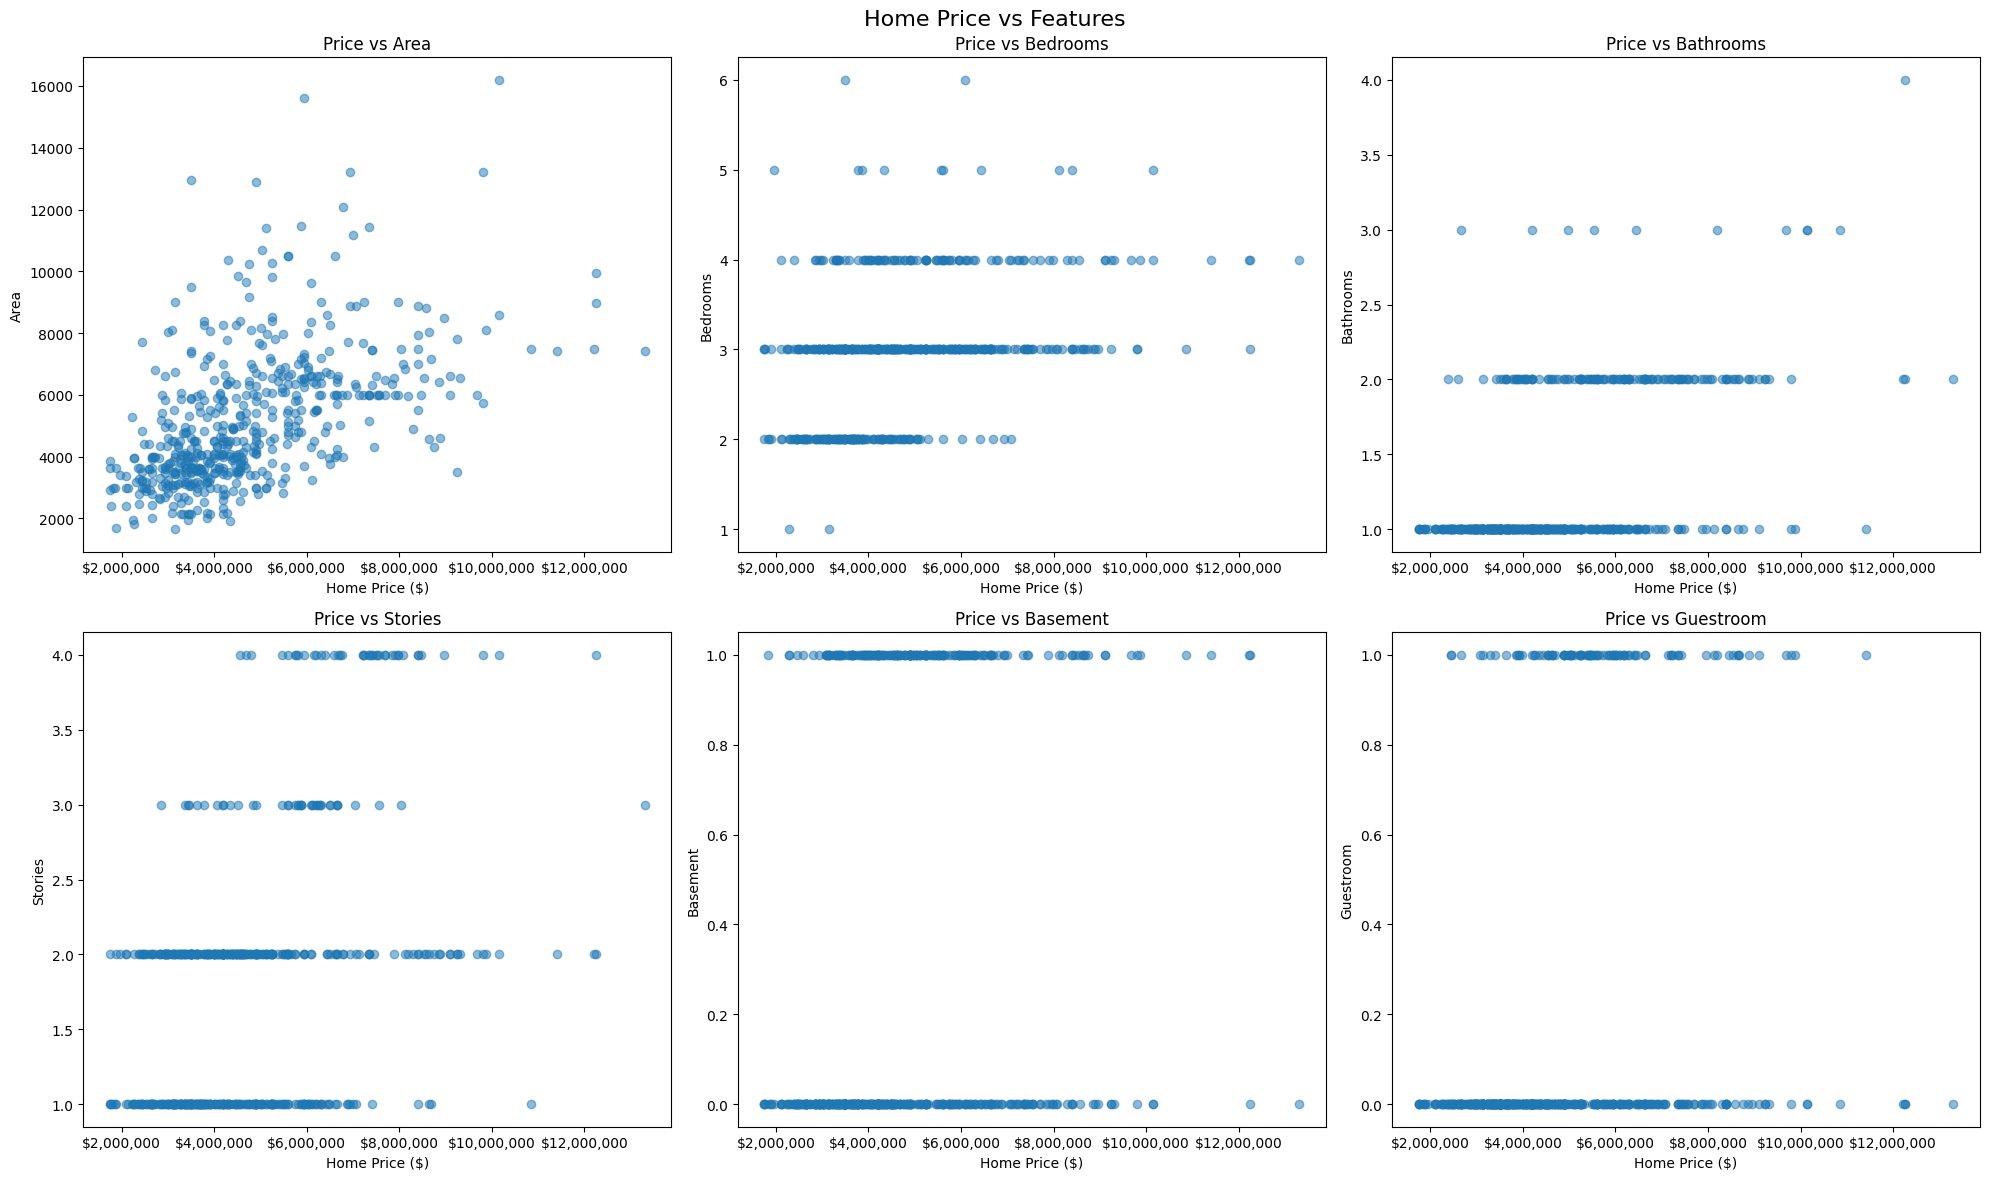

In [48]:
# Create plot for each data feature against price
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'guestroom']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Home Price vs Features', fontsize=16)

axes = axes.ravel()
for idx, feature in enumerate(features):
    axes[idx].scatter(df['price'], df[feature], alpha=0.5)
    axes[idx].set_xlabel('Home Price ($)')
    axes[idx].set_ylabel(feature.capitalize())
    axes[idx].set_title(f'Price vs {feature.capitalize()}')
    
    # Format price labels
    axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

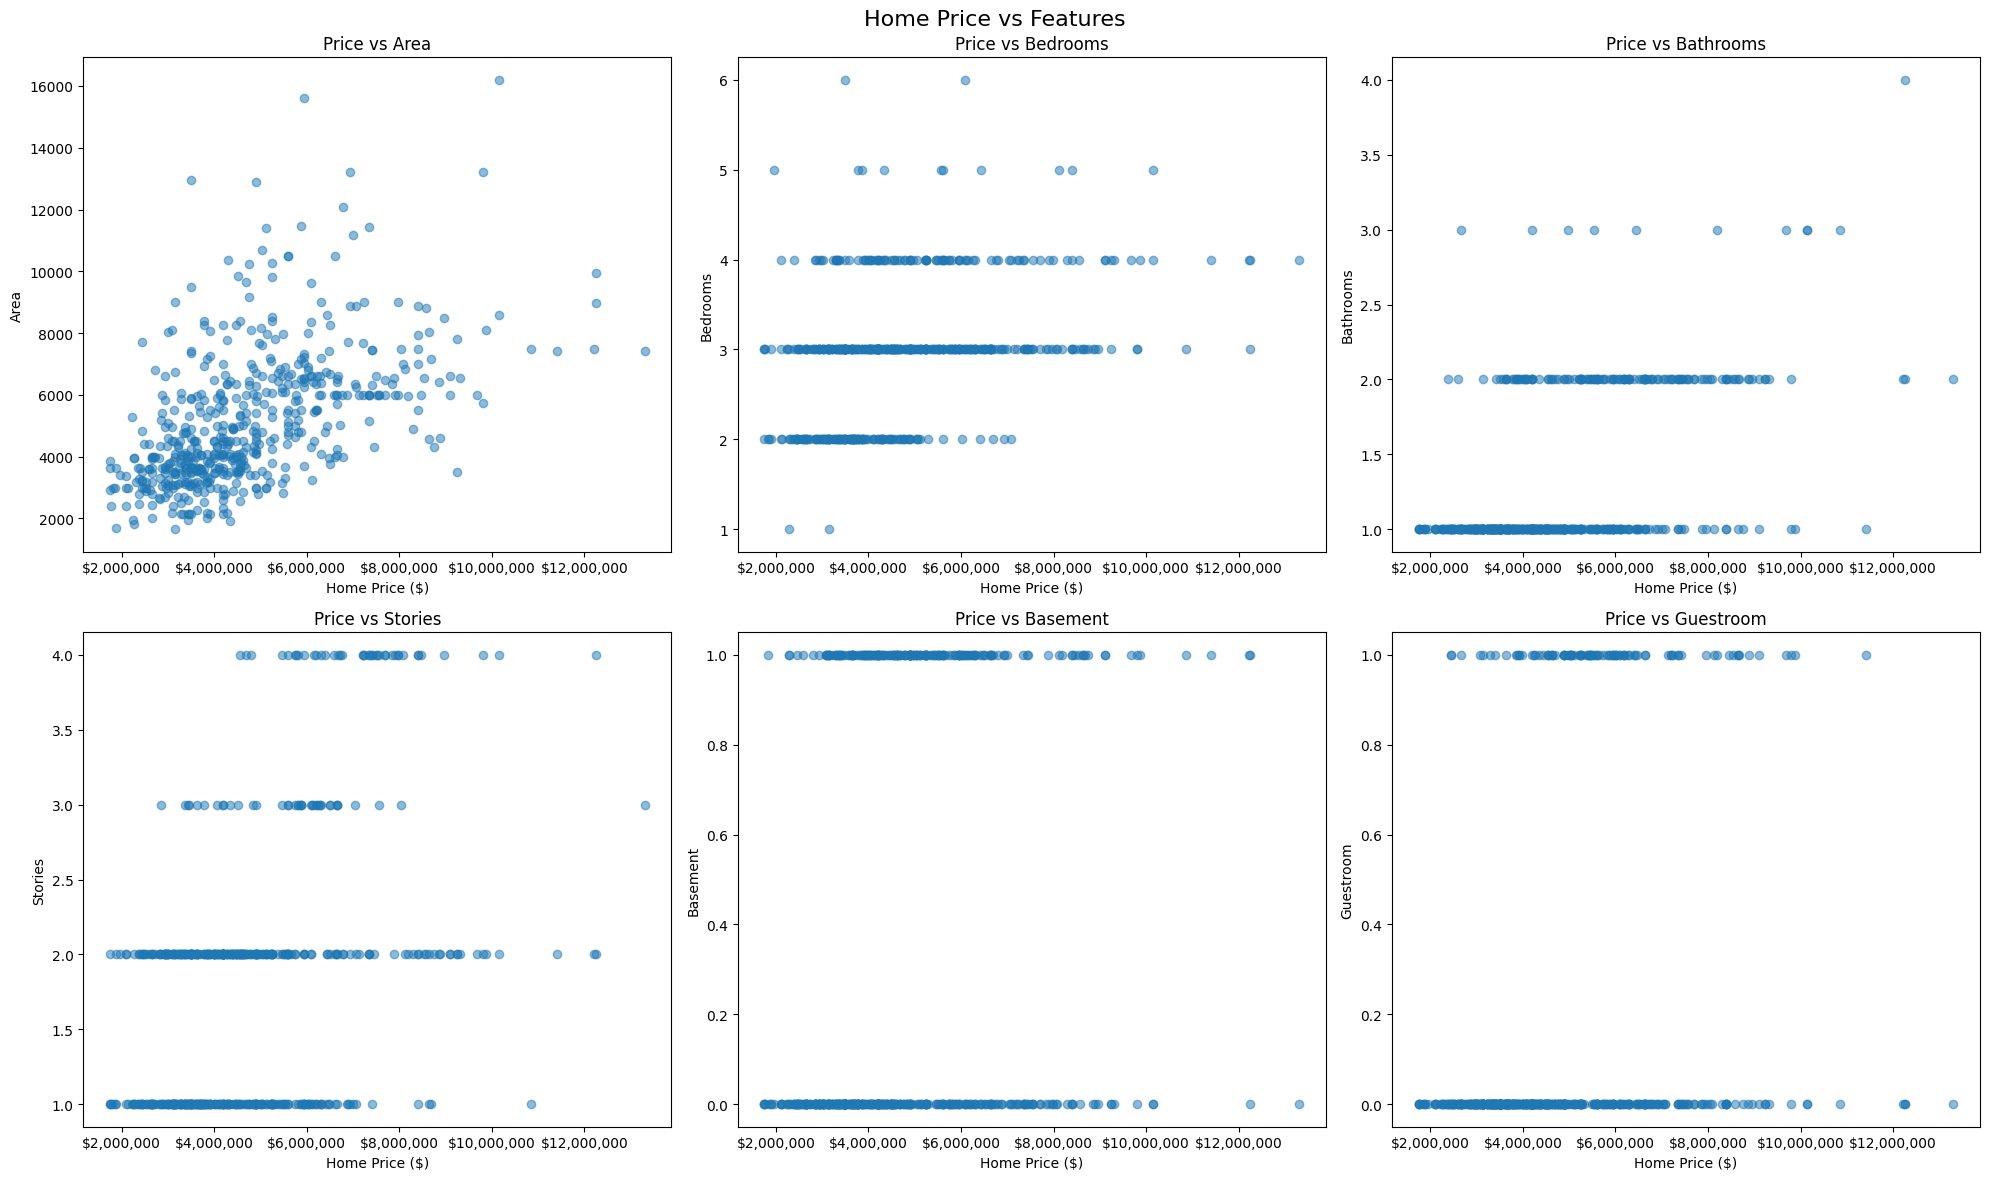

In [49]:
# Create plot for each data feature against price
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'guestroom']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Home Price vs Features', fontsize=16)

axes = axes.ravel()
for idx, feature in enumerate(features):
    axes[idx].scatter(df['price'], df[feature], alpha=0.5)
    axes[idx].set_xlabel('Home Price ($)')
    axes[idx].set_ylabel(feature.capitalize())
    axes[idx].set_title(f'Price vs {feature.capitalize()}')
    
    # Format price labels
    axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

In [50]:
df.head()

,price,area,bedrooms,bathrooms,stories,basement,guestroom
0,13300000,7420,4,2,3,0,0
1,12250000,8960,4,4,4,0,0
2,12250000,9960,3,2,2,1,0
3,12215000,7500,4,2,2,1,0
4,11410000,7420,4,1,2,1,1


In [51]:
# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (545, 6)
Target shape: (545,)


In [52]:
# Safe preprocessing cell: converts common string values to numeric and handles missing values
import numpy as np
import pandas as pd

# Work on a copy so original is preserved if you need it
df2 = df.copy()

# 1) Clean price column (remove $ and commas if present), then convert to numeric
if 'price' in df2.columns:
    df2['price'] = df2['price'].astype(str).str.replace(r'[\$,]', '', regex=True)
    df2['price'] = pd.to_numeric(df2['price'], errors='coerce')

# 2) Map common yes/no textual columns to 0/1
for col in ['basement', 'guestroom']:
    if col in df2.columns:
        df2[col] = df2[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0, 'y': 1, 'n': 0})
        df2[col] = pd.to_numeric(df2[col], errors='coerce')

# 3) Attempt to coerce any remaining object columns to numeric (for numeric strings)
obj_cols = df2.select_dtypes(include=['object']).columns.tolist()
obj_cols = [c for c in obj_cols if c != 'price']
for c in obj_cols:
    df2[c] = pd.to_numeric(df2[c].astype(str).str.replace(',', ''), errors='coerce')

# 4) If there are still non-numeric columns left, either drop or one-hot encode them
remaining_obj = df2.select_dtypes(include=['object']).columns.tolist()
if remaining_obj:
    # choose encoding rather than dropping to preserve information
    df2 = pd.get_dummies(df2, columns=remaining_obj, drop_first=True)

# 5) Impute missing numbers with median (or choose dropna if you prefer)
num_cols = df2.select_dtypes(include=[np.number]).columns
df2[num_cols] = df2[num_cols].fillna(df2[num_cols].median())

# 6) Recreate features and target
X = df2.drop('price', axis=1)
y = df2['price']

print("After preprocessing - X shape:", X.shape, "y shape:", y.shape)
print("X dtypes:\n", X.dtypes.head(20))
print("Any NaNs left:", X.isnull().any().any(), y.isnull().any())

After preprocessing - X shape: (545, 6) y shape: (545,)
X dtypes:
 area           int64
bedrooms       int64
bathrooms      int64
stories        int64
basement     float64
guestroom    float64
dtype: object
Any NaNs left: True False


In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (490, 6)
y_train: (490,)

Testing set shapes:
X_test: (55, 6)
y_test: (55,)


In [54]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate evaluation metric
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:,.2f}") # average dollar error

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
actual_prices = y_test
predicted_prices = y_pred

# Create list of difference between actual and predicted prices
difference = (predicted_prices - actual_prices)

In [ ]:
#Generate plot comparing actual prices to predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted House Prices')

# Format axis labels to show prices in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

In [ ]:
# Generate plot comparing actual prices to prediction differences
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, difference, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], [0, 0], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Amount Difference ($)')
plt.title('Actual Price vs Predicted Difference')

# Format axis labels to show prices in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()